In [1]:
import torch
import torch.optim as optim
import random
from mnist import load_data, train, evaluate, Net, HashedNet
from utils import get_equivalent_compression

use_cuda = torch.cuda.is_available()
torch.manual_seed(1)
random.seed(1)

In [2]:
device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader, valid_loader, test_loader = load_data(batch_size=50, kwargs=kwargs)

def train_nn(compress, hashed):
    input_dim = 784
    output_dim = 10
    
    if hashed:
        model = HashedNet(input_dim, output_dim, 1, 1000,
                          compress, dropout=0.25).to(device)
    else:
        eq_compress = get_equivalent_compression(input_dim, output_dim,
                                                 1000, 1, compress)
        model = Net(input_dim, output_dim, 1, 1000,
                    eq_compress, 0.25).to(device)

    optimizer = optim.SGD(model.parameters(), lr=0.01,
                          momentum=0.9,
                          weight_decay=0.0)

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                     factor=0.1,
                                                     patience=2,
                                                     verbose=True)

    print('The number of parameters is: {}'.format(
        sum(p.numel() for p in model.parameters() if p.requires_grad)))

    for epoch in range(1, 50 + 1):
        tr_loss = train(model, device, train_loader, optimizer, epoch, log_interval=50)
        val_loss, val_acc = evaluate(model, device, valid_loader)
        scheduler.step(val_loss)
        print('Epoch {} Train loss: {:.3f} Val loss: {:.3f} Val acc: {:.2f}%'.format(
              epoch, tr_loss, val_loss, val_acc))

    test_loss, test_acc = evaluate(model, device, test_loader)
    print('Test loss: {:.3f} Test acc: {:.2f}%'.format(test_loss, test_acc))
    
    return test_loss, test_acc

compression_rates = [1/64, 1/32, 1/16, 1/8, 1]
nn_records = []
hashednn_records = []
for compression in compression_rates:
    print("Compression rate: {}".format(compression))
    nn_records.append(train_nn(compression, hashed=False))
    hashednn_records.append(train_nn(compression, hashed=True))

Compression rate: 0.015625
The number of parameters is: 12730
Epoch 1 Train loss: 0.698 Val loss: 0.298 Val acc: 91.05%
Epoch 2 Train loss: 0.540 Val loss: 0.262 Val acc: 92.23%
Epoch 3 Train loss: 0.526 Val loss: 0.263 Val acc: 91.97%
Epoch 4 Train loss: 0.515 Val loss: 0.255 Val acc: 91.85%
Epoch 5 Train loss: 0.505 Val loss: 0.243 Val acc: 92.58%
Epoch 6 Train loss: 0.498 Val loss: 0.243 Val acc: 92.82%
Epoch 7 Train loss: 0.501 Val loss: 0.243 Val acc: 92.80%
Epoch 8 Train loss: 0.497 Val loss: 0.239 Val acc: 92.87%
Epoch 9 Train loss: 0.493 Val loss: 0.239 Val acc: 92.70%
Epoch 10 Train loss: 0.490 Val loss: 0.235 Val acc: 93.00%
Epoch 11 Train loss: 0.493 Val loss: 0.237 Val acc: 93.20%
Epoch 12 Train loss: 0.496 Val loss: 0.242 Val acc: 92.73%
Epoch    12: reducing learning rate of group 0 to 1.0000e-03.
Epoch 13 Train loss: 0.479 Val loss: 0.238 Val acc: 92.75%
Epoch 14 Train loss: 0.446 Val loss: 0.221 Val acc: 93.62%
Epoch 15 Train loss: 0.435 Val loss: 0.220 Val acc: 93.50%


Epoch 22 Train loss: 0.239 Val loss: 0.122 Val acc: 96.45%
Epoch 23 Train loss: 0.239 Val loss: 0.123 Val acc: 96.47%
Epoch    23: reducing learning rate of group 0 to 1.0000e-04.
Epoch 24 Train loss: 0.236 Val loss: 0.122 Val acc: 96.40%
Epoch 25 Train loss: 0.235 Val loss: 0.122 Val acc: 96.43%
Epoch 26 Train loss: 0.237 Val loss: 0.122 Val acc: 96.50%
Epoch    26: reducing learning rate of group 0 to 1.0000e-05.
Epoch 27 Train loss: 0.233 Val loss: 0.122 Val acc: 96.45%
Epoch 28 Train loss: 0.234 Val loss: 0.122 Val acc: 96.45%
Epoch 29 Train loss: 0.233 Val loss: 0.122 Val acc: 96.45%
Epoch    29: reducing learning rate of group 0 to 1.0000e-06.
Epoch 30 Train loss: 0.233 Val loss: 0.122 Val acc: 96.47%
Epoch 31 Train loss: 0.233 Val loss: 0.122 Val acc: 96.47%
Epoch 32 Train loss: 0.238 Val loss: 0.122 Val acc: 96.47%
Epoch    32: reducing learning rate of group 0 to 1.0000e-07.
Epoch 33 Train loss: 0.237 Val loss: 0.122 Val acc: 96.47%
Epoch 34 Train loss: 0.232 Val loss: 0.122 V

Epoch    43: reducing learning rate of group 0 to 1.0000e-06.
Epoch 44 Train loss: 0.125 Val loss: 0.075 Val acc: 97.73%
Epoch 45 Train loss: 0.123 Val loss: 0.075 Val acc: 97.73%
Epoch 46 Train loss: 0.125 Val loss: 0.075 Val acc: 97.73%
Epoch    46: reducing learning rate of group 0 to 1.0000e-07.
Epoch 47 Train loss: 0.124 Val loss: 0.075 Val acc: 97.73%
Epoch 48 Train loss: 0.123 Val loss: 0.075 Val acc: 97.73%
Epoch 49 Train loss: 0.123 Val loss: 0.075 Val acc: 97.73%
Epoch    49: reducing learning rate of group 0 to 1.0000e-08.
Epoch 50 Train loss: 0.123 Val loss: 0.075 Val acc: 97.73%
Test loss: 0.078 Test acc: 97.72%
The number of parameters is: 49698
Epoch 1 Train loss: 0.330 Val loss: 0.134 Val acc: 95.75%
Epoch 2 Train loss: 0.205 Val loss: 0.118 Val acc: 96.47%
Epoch 3 Train loss: 0.179 Val loss: 0.101 Val acc: 96.68%
Epoch 4 Train loss: 0.166 Val loss: 0.097 Val acc: 97.25%
Epoch 5 Train loss: 0.157 Val loss: 0.092 Val acc: 97.15%
Epoch 6 Train loss: 0.151 Val loss: 0.083 

Epoch 14 Train loss: 0.065 Val loss: 0.065 Val acc: 98.20%
Epoch 15 Train loss: 0.055 Val loss: 0.064 Val acc: 98.27%
Epoch 16 Train loss: 0.052 Val loss: 0.064 Val acc: 98.22%
Epoch 17 Train loss: 0.051 Val loss: 0.063 Val acc: 98.27%
Epoch 18 Train loss: 0.047 Val loss: 0.062 Val acc: 98.25%
Epoch 19 Train loss: 0.047 Val loss: 0.063 Val acc: 98.25%
Epoch 20 Train loss: 0.048 Val loss: 0.062 Val acc: 98.25%
Epoch 21 Train loss: 0.045 Val loss: 0.062 Val acc: 98.32%
Epoch 22 Train loss: 0.046 Val loss: 0.061 Val acc: 98.22%
Epoch 23 Train loss: 0.045 Val loss: 0.061 Val acc: 98.32%
Epoch 24 Train loss: 0.045 Val loss: 0.061 Val acc: 98.27%
Epoch 25 Train loss: 0.045 Val loss: 0.060 Val acc: 98.35%
Epoch 26 Train loss: 0.044 Val loss: 0.059 Val acc: 98.28%
Epoch 27 Train loss: 0.042 Val loss: 0.060 Val acc: 98.22%
Epoch 28 Train loss: 0.041 Val loss: 0.060 Val acc: 98.30%
Epoch    28: reducing learning rate of group 0 to 1.0000e-04.
Epoch 29 Train loss: 0.042 Val loss: 0.061 Val acc: 9

Epoch 33 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch    33: reducing learning rate of group 0 to 1.0000e-08.
Epoch 34 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch 35 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch 36 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 37 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 38 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 39 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch 40 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch 41 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch 42 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 43 Train loss: 0.023 Val loss: 0.049 Val acc: 98.62%
Epoch 44 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 45 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 46 Train loss: 0.022 Val loss: 0.049 Val acc: 98.62%
Epoch 47 Train loss: 0.021 Val loss: 0.049 Val acc: 98.62%
Epoch 48 Train loss: 0.022 Val loss: 0.049 Val acc: 9

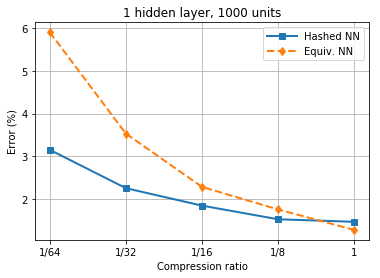

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.plot([100.0-x[1] for x in hashednn_records], 's-', linewidth=2, label='Hashed NN')
ax.plot([100.0-x[1] for x in nn_records], 'd--', linewidth=2, label='Equiv. NN')
ax.set_xticklabels(['1/64', '1/32', '1/16', '1/8', '1'])
ax.set_xticks(range(len(compression_rates)))
ax.set_xlabel('Compression ratio')
ax.set_ylabel('Error (%)')
plt.title("1 hidden layer, 1000 units")
plt.legend(handlelength=3)
plt.grid()
plt.savefig('example.svg')
plt.show()